In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from src.data.analyse import *
from ema_workbench.analysis import feature_scoring
from ema_workbench import load_results

In [3]:
# TODO: Do not forget to aggregate across replications or select a single one

In [3]:
# Load results
n_scenarios = 30000
n_policies = 0
income_loss = False
results = load_results(f'../results/scenarios={n_scenarios}, policies={n_policies}, income_loss={income_loss}.tar.gz')

# Prepare outcomes
outcomes = prepare_outcomes(results, add_policies=False, add_uncertainties=True)

WARNING! Random seeds are not unique.


## EDA

In [36]:
outcomes['random_seed'].value_counts()

55    2682
76    2682
6     2682
99    2682
93    2682
      ... 
28    2664
22    2664
84    2664
50    2664
26    2664
Name: random_seed, Length: 101, dtype: int64

In [37]:
uncertainties_of_interest = ['consumption_utility',
                             'discount_rate',
                             'income_and_expenditure_growth',
                             'poverty_bias',
                             # 'random_seed'
                             ]

outcomes_of_interest = ['n_new_poor',
                        'annual_average_consumption_loss_pct',
                        'r']

district = 'Castries'
df = outcomes[outcomes['district'] == district]
top_5_random_seeds = df['random_seed'].value_counts().index[:5]
df = df[df['random_seed'].isin([6])]
# df = df.drop_duplicates(subset=['random_seed'])

In [32]:
# df.groupby('random_seed').mean(numeric_only=True)[outcomes_of_interest].plot.box(subplots=True, figsize=(12, 4));

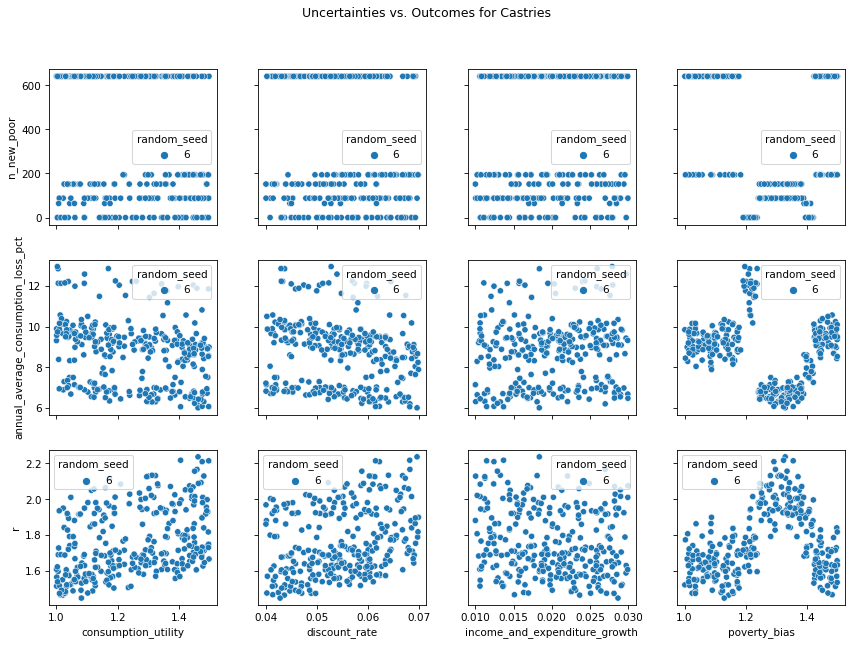

In [38]:
ncols = len(uncertainties_of_interest)
nrows = len(outcomes_of_interest)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * int(ncols / 2), 3 * nrows), sharey='row', sharex='col')

for uncertainty in uncertainties_of_interest:
    for outcome in outcomes_of_interest:
        sns.scatterplot(data=df,
                        x=uncertainty, 
                        y=outcome, 
                        palette='tab10',
                        hue='random_seed',
                        ax=ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)])

        ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)].set_xlabel(uncertainty)
        ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)].set_ylabel(outcome)
fig.suptitle(f'Uncertainties vs. Outcomes for {district}')
fig.tight_layout(pad=3.0)

## Feature scoring

In [39]:
# Select uncertainties and outcomes of interest
uncertainties_of_interest = ['consumption_utility',
                             'discount_rate',
                             'income_and_expenditure_growth',
                             'poverty_bias']

outcomes_of_interest = ['n_new_poor',
                        'annual_average_consumption_loss_pct',
                        'r']

# Select district
district = 'Castries'
df = outcomes[outcomes['district'] == district]
top_5_random_seeds = df['random_seed'].value_counts().index[:5]
df = df[df['random_seed'].isin([6])]

In [40]:
x = df[uncertainties_of_interest + ['scenario', 'policy']]
y = df[outcomes_of_interest].to_dict('list')
fs = feature_scoring.get_feature_scores_all(x, y)

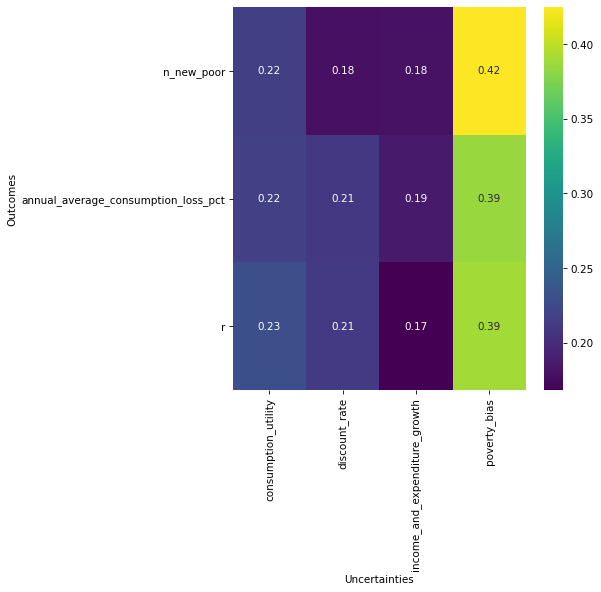

In [41]:
plt.figure(figsize=(8, 8))
sns.heatmap(fs.T, cmap="viridis", annot=True)
plt.tight_layout()
plt.ylabel('Outcomes')
plt.xlabel('Uncertainties');